* XHR ( Developer tool >> Network tab >> (XHR) ) <br>
XHR >> In the ajax, XHR is javascrpit object which in charge of asynchronous communication 

* Image drawing 
*       >> Image.display() from Jupyter 
* Graph drawing
*       >> Matplotlib(histogram, pie chart)
*       >> Seaborn(countplot, distplot)

In [108]:
import pandas as pd
import numpy as np
from bs4 import BeautifulSoup
import requests,re
from urllib.parse import urljoin

def cleaning_str(some_str):
    regex = re.compile(r'[\n\r\t]')
    result = regex.sub('',some_str)
    return result.strip().replace(' ' ,'')

url = 'https://www.assembly.go.kr/assm/memact/congressman/memCond/memCondListAjax.do?currentPage=1&rowPerPage=300'
html = requests.get(url).text
soup = BeautifulSoup(html, 'html.parser')

men_list = soup.select('.memberna_list dl dt a')
# print(len(men_list))
men_dicts = []
for men in men_list:
    name = men.string
    matched = re.search(r"(\d+)", men['href'])
    link = f"https://www.assembly.go.kr/assm/memPop/memPopup.do?dept_cd={matched.group(0)}"
    # print(f'{name} {link}')
    men_dicts.append({
        'name' : name,
        'link' : link,
    })
congressman = []
for link in men_dicts:
    html = requests.get(link['link']).text
    soup = BeautifulSoup(html, 'html.parser')
    # print(link['name'], end = ' ')
    birth_day = ''
    img_url =''
    party = ''
    elec = ''
    dt = []
    dd = []
    for i in soup.select('.pro_detail dd'): ## data
        if i.string is None:
            dd.append("NULL")
        else:
            dd.append(cleaning_str(i.string)) #
    for i in soup.select('.pro_detail dt'): ## title 
        dt.append(i.string)
    congressman_dict = dict(zip(dt,dd))
    for i in soup.select('.profile'):
        congressman_dict['이름'] = link['name']
        congressman_dict['생년월일'] = i.select_one('li:nth-of-type(4)').string
        congressman_dict['image'] = urljoin(link['link'], i.select_one("img")['src'])

    congressman.append(congressman_dict)
    print(f'{link["name"]}\'s information has appended')
print('Finished!')
    # print(congressman_dict)
# data = pd.DataFrame.from_dict(congressman)
# data

강기윤's information has appended
강대식's information has appended
강득구's information has appended
강민국's information has appended
강민정's information has appended
강병원's information has appended
강선우's information has appended
강은미's information has appended
강준현's information has appended
강훈식's information has appended
고민정's information has appended
고영인's information has appended
고용진's information has appended
곽상도's information has appended
구자근's information has appended
권명호's information has appended
권성동's information has appended
권영세's information has appended
권은희's information has appended
권인숙's information has appended
권칠승's information has appended
기동민's information has appended
김경만's information has appended
김경협's information has appended
김교흥's information has appended
김기현's information has appended
김남국's information has appended
김도읍's information has appended
김두관's information has appended
김미애's information has appended
김민기's information has appended
김민석's information has appended
김민철's in

In [109]:
from IPython.display import Image, display
data = pd.DataFrame.from_dict(congressman)
# data
data['당선횟수2'] = data['당선횟수'].str[:2] ### Series object to string >> this makes can sliciing

for image_url in data['image'].head(2):
    print(type(image_url), image_url)
    display(Image(url = image_url))

<class 'str'> https://www.assembly.go.kr/photo/9771230.jpg


<class 'str'> https://www.assembly.go.kr/photo/9771142.jpg


In [110]:
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import seaborn as sns
import pandas as pd
%matplotlib inline # This makes notebook can draw without plt.show

sns.set()
## Korean fonts setting 
font_path = "C:\windows\Fonts\malgun.ttf"
## Get font property
font_prop = fm.FontProperties(fname = font_path).get_name()
## In Matplotlib, rc(run command) command >> set the korean font
matplotlib.rc('font', family = font_prop)

#### Seabron graph
* barplot - Can set the y axis, x axis both
* countplot - Can set the one in y axis ans x axis

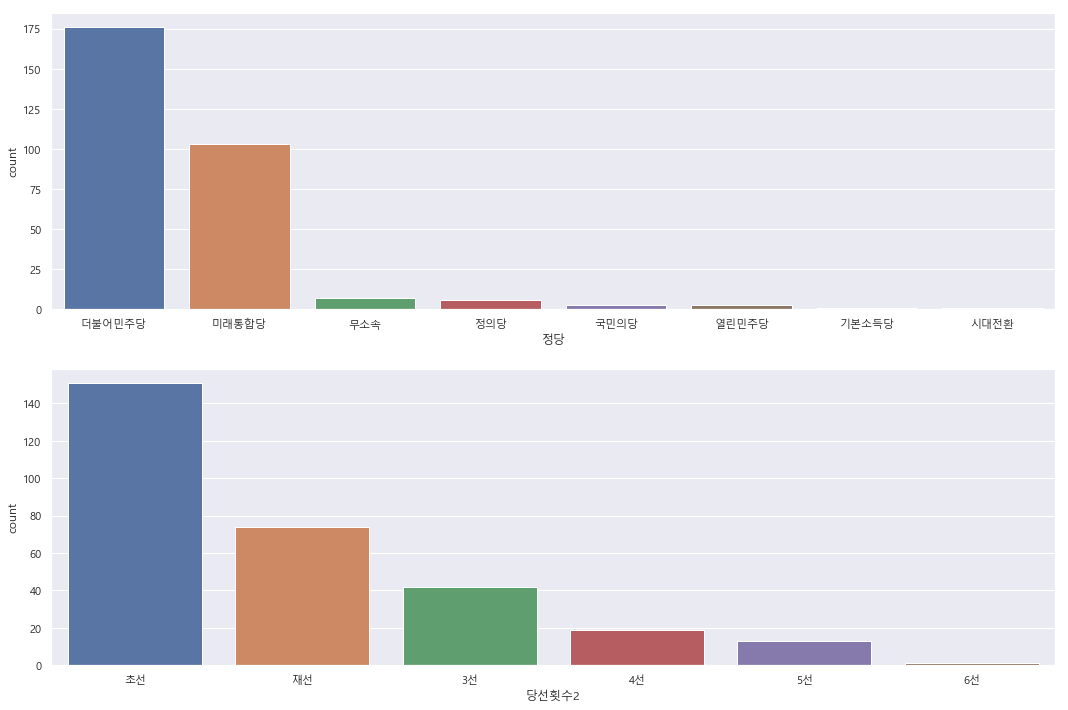

In [158]:
figure, (ax1, ax2) = plt.subplots(nrows = 2, ncols = 1)
figure.set_size_inches(18,12)
sns.countplot(data = data, x = '정당', ax = ax1, order = data['정당'].value_counts().index)
sns.countplot(data = data, x= '당선횟수2', ax = ax2, \
                order= data['당선횟수2'].value_counts().index)
# sns.countplot(data = data, x = '정당', ax = ax1 )
# sns.countplot(data = data, x= '당선횟수2', ax = ax2)

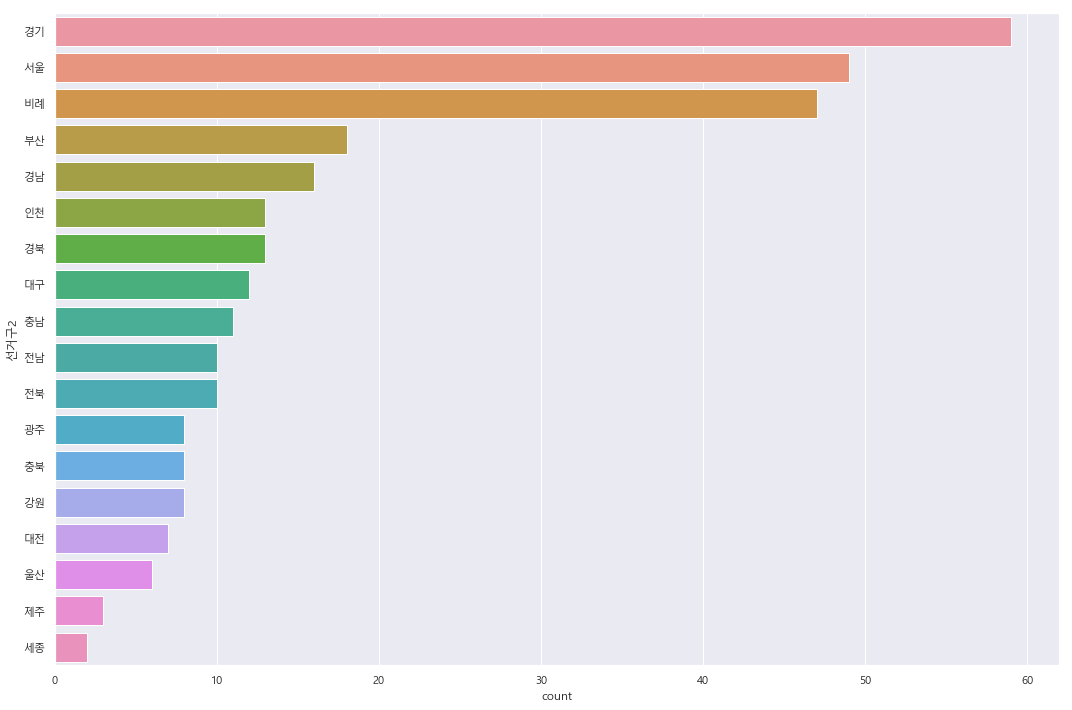

In [160]:
data['선거구2'] = data['선거구'].str[:2]
data['선거구2'].value_counts()


figure, ax3 = plt.subplots(nrows= 1, ncols =1)
figure.set_size_inches(18,12)
sns.countplot(y= '선거구2', data = data, ax = ax3, \
    order = data['선거구2'].value_counts().index)

In [113]:
from datetime import date
# year = data['생년월일']
age_max = data['생년월일'].str[:4].max()
age_min = data['생년월일'].str[:4].min()
data['year'] = data['생년월일'].str[:4].astype(int)
data['month'] = data['생년월일'].str[5:7].astype(int)
data['day'] = data['생년월일'].str[8:10].astype(int)
data.loc[:,'year':'day']

def calc_age(dtob):
    today = date.today()
    return today.year - dtob.year - ((today.month, today.day) < (dtob.month, dtob.day))
for idx,row in data.iterrows():
    age = calc_age(date(row['year'], row['month'], row['day']))
    data.loc[idx,'age'] = int("{:2d}".format(age))

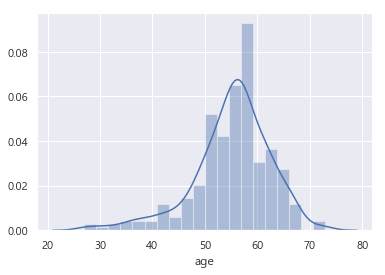

In [119]:
sns.distplot(data['age'], hist = True)

#### Warning message from Jupyter
* import warnings
* To hide warning message, warnings.filterwarnings(action = 'ignore')
* To watch warning message, warnings.filterwarnings(action = 'default')

In [115]:
print('최고령 : ', data['age'].max())
print('최저령 : ', data['age'].min())
print('평균 나이 : ', int(data['age'].mean()))

최고령 :  73.0
최저령 :  27.0
평균 나이 :  55


In [116]:
data.loc[(data['age'] < 30) |( data['age'] > 70), ['이름','정당','당선횟수2','age']]

,이름,정당,당선횟수2,age
65,김진표,더불어민주당,5선,73.0
80,류호정,정의당,초선,27.0
114,변재일,더불어민주당,5선,71.0
233,전용기,더불어민주당,초선,28.0
290,홍문표,미래통합당,4선,72.0


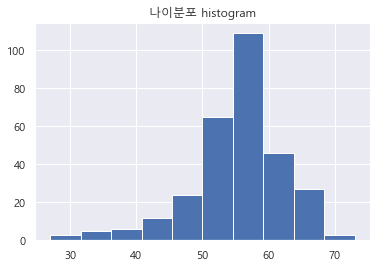

In [121]:
# Histogram by matplotlib

plt.title('나이분포 histogram')
arrays, bins, patches = plt.hist(data['age'])
# print(arrays, bins, patches)

Text(0.5,1,'선거구 분포')

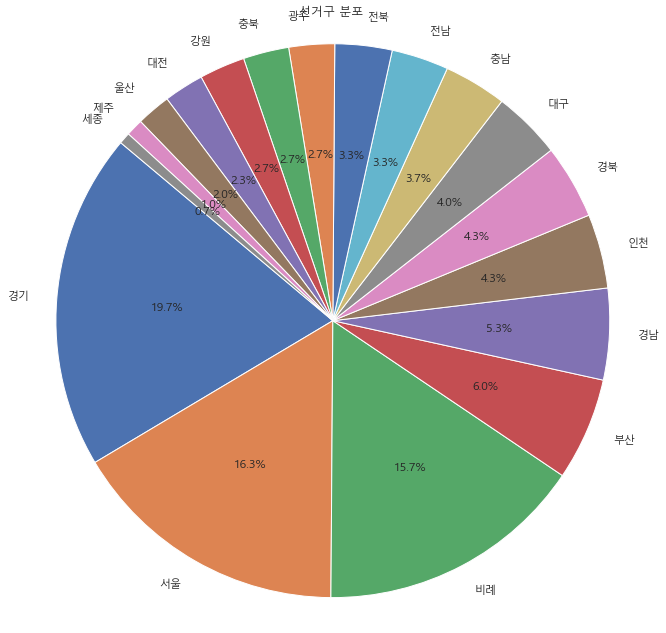

In [161]:
# Pie plot from matplotlib

temp = data['선거구2'].value_counts(normalize= True)
plt.figure(figsize=(11,11))
plt.pie(x = temp, labels = temp.index, autopct= '%1.1f%%', startangle=140, )#\
    # shadow = True, )
plt.axis('equal') ## When draw pie plot, this will make plot more 'circle style'
plt.title('선거구 분포')